In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
fig_path = '../figures/'

In [3]:
'''
To do list:
# 1. What distances are most popular between men and women
# 2. How many races occur over time
3. Where do the most racers come from WORKING ON IT
4. Most prominent age categories when compared to distance/length WORKING ON IT
5. How many races go over 1 day. WORKING ON IT
6. Who are the fastest athletes for the top 10 or so distances
# 7. What athletes win the most races
'''

'\nTo do list:\n# 1. What distances are most popular between men and women\n# 2. How many races occur over time\n3. Where do the most racers come from\n4. Most prominent age categories when compared to distance/length\n5. How many races go over 1 day.\n6. Who are the fastest athletes for the top 10 or so distances\n7. When do the most races occur\n8. What athletes participate in the most races.\n'

In [4]:
df = pd.read_csv('../data/ultra_marathons_data_cleaned.csv')
try:
    df.drop('Unnamed: 0', axis=1, inplace=True)
except:
    pass
df.head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8944\3470472946.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ultra_marathons_data_cleaned.csv')


,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
0,2018,Selva Costera (CHI),50.00,22,0.00,Tnfrc,CHI,1978,M,M35,10.286,0,km,2018-01-06,2018-01-06,4:51:39
1,2018,Selva Costera (CHI),50.00,22,0.00,Roberto Echeverría,CHI,1981,M,M35,9.501,1,km,2018-01-06,2018-01-06,5:15:45
2,2018,Selva Costera (CHI),50.00,22,0.00,Puro Trail Osorno,CHI,1987,M,M23,9.472,2,km,2018-01-06,2018-01-06,5:16:44
3,2018,Selva Costera (CHI),50.00,22,0.00,Columbia,ARG,1976,M,M40,8.976,3,km,2018-01-06,2018-01-06,5:34:13
4,2018,Selva Costera (CHI),50.00,22,0.00,Baguales Trail,CHI,1992,M,M23,8.469,4,km,2018-01-06,2018-01-06,5:54:14


In [5]:
df.isnull().sum()

year_of_event            0
event_name               0
distance_or_length    1436
no_of_finishers          0
total_distance           2
athlete_club            42
athlete_country          3
birth_year               0
gender                   7
age_category             0
average_speed          224
athlete_id               0
race_metric           1436
start_date               0
end_date                19
fastest_time           189
dtype: int64

In [6]:
df['race_metric'].value_counts()

race_metric
km       6156513
mi        776590
hours     514466
days       12190
Name: count, dtype: int64

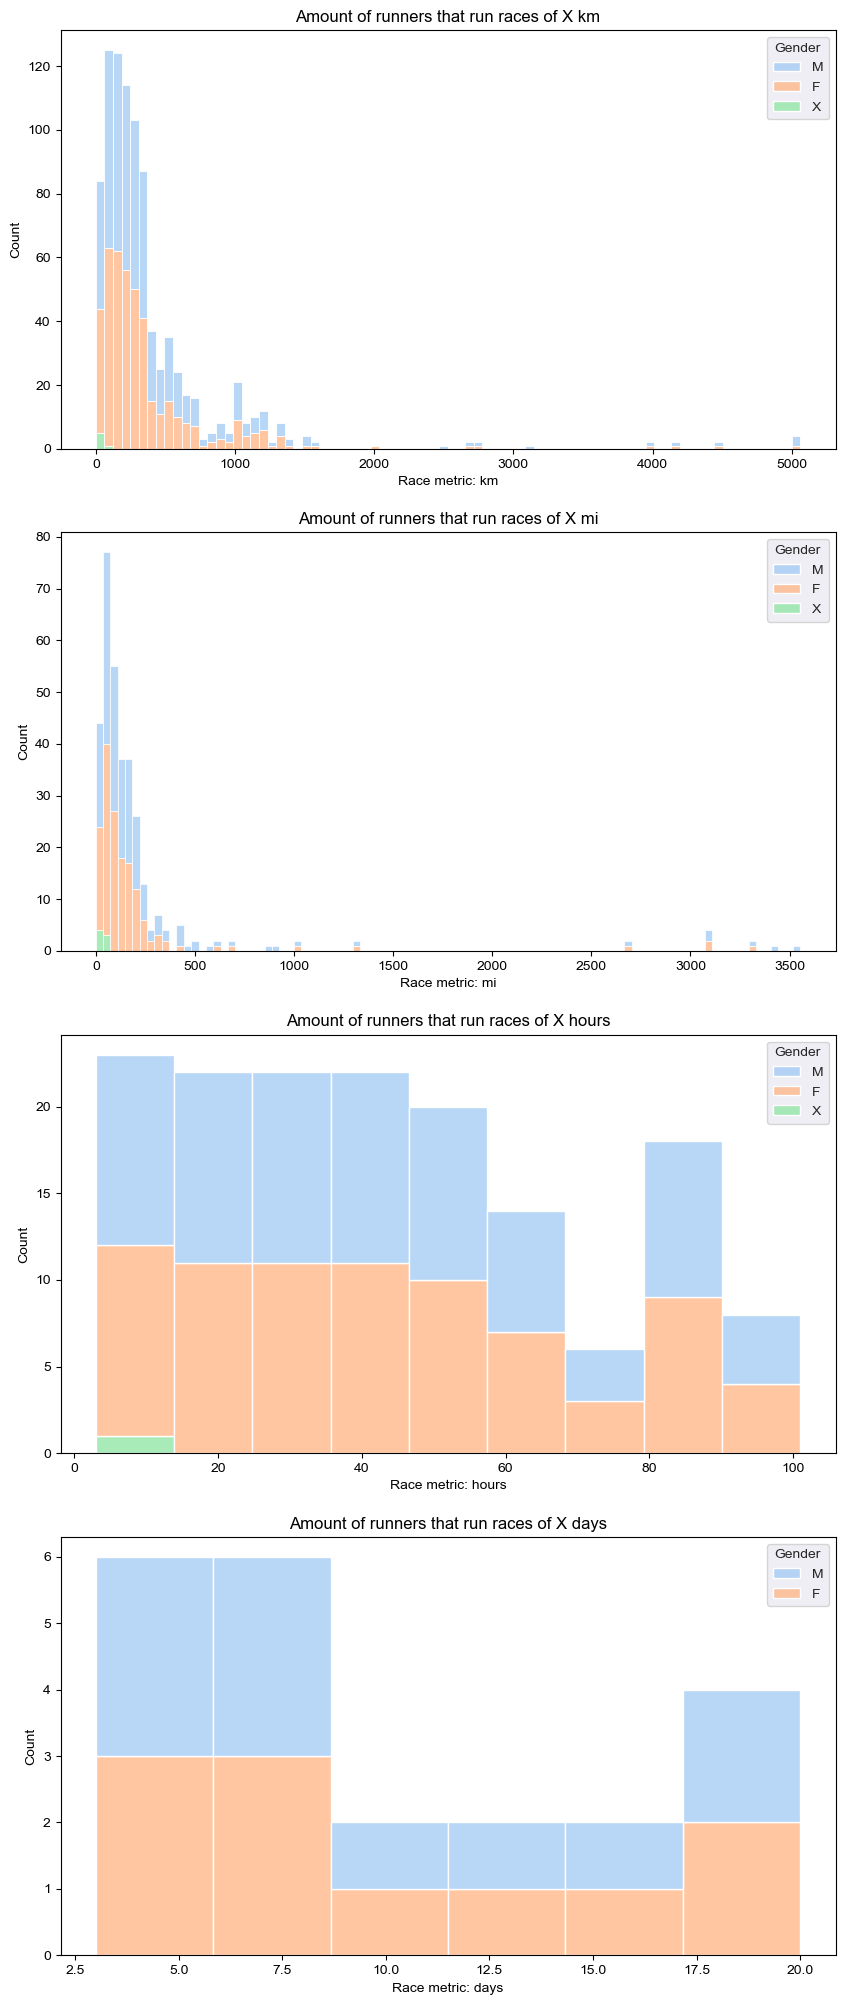

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(10, 25))
sns.set_palette('pastel')
sns.set_style('darkgrid')
for metric, i in [
    ('km', 0),
    ('mi', 1),
    ('hours', 2),
    ('days', 3)
]:
    temp_df = df[['gender', 'distance_or_length', 'race_metric']
                 ][df['race_metric'] == metric].value_counts().reset_index()
    temp_df.columns = ['Gender', 'Distance', 'Metric', 'Count']

    sns.histplot(data=temp_df, x='Distance',
                 hue='Gender', multiple='stack', ax=ax[i])
    ax[i].set_title(f'Amount of runners that run races of X {metric}')
    ax[i].set_xlabel(f'Race metric: {metric}')
    
fig.savefig(f'{fig_path}count_of_runners_by_distance.jpg')

In [8]:
df['start_date'].value_counts().reset_index().sort_values(by = 'start_date', ascending = True)

,start_date,count
6938,1798-08-01,1
6703,1801-11-01,3
6950,1801-11-10,1
6951,1801-12-02,1
6949,1802-07-01,1
...,...,...
4622,2022-12-26,50
6020,2022-12-27,13
2470,2022-12-28,385
3822,2022-12-29,100


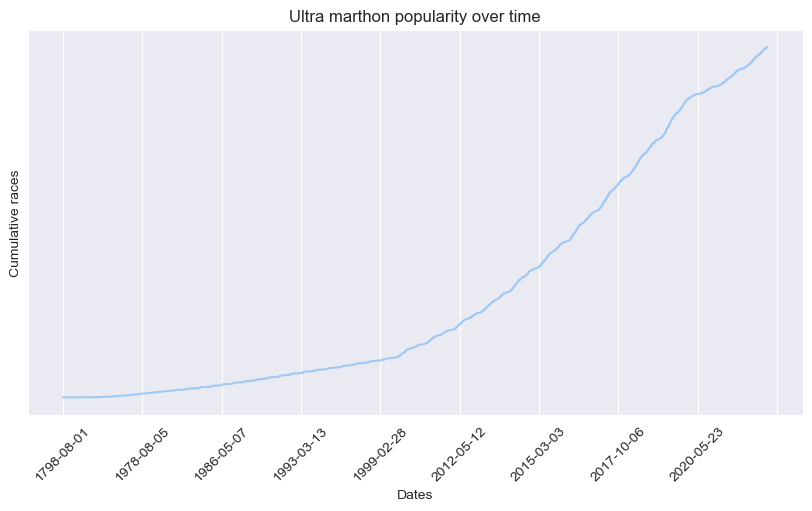

In [9]:
# Ultra marathon race popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
dates_df = df['start_date'].value_counts().reset_index().sort_values(by = 'start_date', ascending = True)
dates_df['cumsum'] = dates_df['count'].cumsum()
sns.lineplot(data = dates_df, x = 'start_date', y = 'cumsum', ax = ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_title('Ultra marthon popularity over time')
ax.set_xlabel('Dates')
ax.set_ylabel('Cumulative races')
ax.set_yticks([])
plt.xticks(rotation = 45)
fig.savefig(f'{fig_path}ultras_popularity_over_time.jpg')

In [10]:
# country_counts = df['athlete_country'].value_counts().reset_index()
# country_counts = ['country_code', 'count']
# # Assuming you have a DataFrame `country_coords` with 'country_code', 'lat', and 'lon'
# country_counts = country_counts.merge(country_coords, on='country_code')


# fig = go.Figure(go.Scattergeo())
# fig.update_geos(projection_type="orthographic")
# fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [16]:
athlete_races = df[['athlete_id', 'gender'], :]
athlete_races['race_age'] = df.loc['year_of_event'] - df['birth_year']
athlete_races['race_count'] = (
    athlete_races['athlete_id'] == athlete_races['athlete_id']).sum()

print(athlete_races.columns)


fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=athlete_races, x='race_count',
                y='race_age', hue='gender')

ax.set_title('Athlete age groups and amount of races completed')
ax.set_ylabel('# of races finished')
ax.set_xlabel('Age group')

plt.tight_layout()

InvalidIndexError: (['athlete_id', 'gender'], slice(None, None, None))

In [19]:
((df['race_metric'] == 'days') | (pd.to_timedelta(df['fastest_time']) >= pd.to_timedelta('24:00:00'))).sum()

538783

In [20]:
df.dtypes

year_of_event           int64
event_name             object
distance_or_length    float64
no_of_finishers         int64
total_distance        float64
athlete_club           object
athlete_country        object
birth_year              int64
gender                 object
age_category           object
average_speed          object
athlete_id              int64
race_metric            object
start_date             object
end_date               object
fastest_time           object
dtype: object

In [54]:
winners_male = df[df['gender'] == 'M'].sort_values(by = 'fastest_time', ascending = False).drop_duplicates(subset = 'event_name')
winners_female = df[df['gender'] == 'F'].sort_values(by = 'fastest_time', ascending = False).drop_duplicates(subset = 'event_name')
winners_male.head()

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
3828751,2000,Sri Chinmoy Ultra Trio 700 Mile Race (USA),700.00,12,0.00,"Jamaica, NY",USA,1952,M,M45,4.70,219882,mi,2010-09-10,2010-09-23,9d 23:51:20
2937253,2021,The Last Annual Heart of the South Road Race (...,326.00,46,0.00,"Blacksburg, VA",USA,1977,M,M40,2.191,1202,mi,2021-06-17,2021-06-27,9d 23:25:57
3371218,2022,MilKil - 1000 km de France (FRA),1002.00,14,0.00,Unknown,FRA,1968,M,M50,4.187,18503,km,2022-06-12,2022-06-25,9d 23:17:40
3654613,1996,Nanango 1000 Mile Track Race - 1000km Split (AUS),1000.00,16,0.00,Unknown,CAN,1940,M,M55,4.18,1069846,km,1996-03-13,1996-03-29,9d 23:15:35
5815025,2013,Last Annual Vol-State 500K Endurance Run (USA),500.00,33,0.00,FL,USA,1965,M,M45,2.091,1386338,km,2013-07-11,2013-07-20,9d 23:08:40


In [55]:
winners_female.head()

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
2463669,2019,"Across the Years, 10 days - 1000km Split (USA)",1000.00,5,0.00,"Seattle, WA",USA,1971,F,W45,4.174,11736,km,2019-12-28,2020-01-07,9d 23:33:16
2937252,2021,The Last Annual Heart of the South Road Race (...,326.00,46,0.00,"Newland, NC",USA,1982,F,W35,2.191,901860,mi,2021-06-17,2021-06-27,9d 23:25:26
2578723,2020,Last Annual Vol-State 500K Endurance Run (USA),500.00,50,0.00,Unknown,USA,1956,F,W60,2.089,818607,km,2020-07-09,2020-07-19,9d 23:18:14
3662035,1997,1000 Mile Stadium Run Odessa - 1000km Split (UKR),1000.00,2,0.00,Unknown,GER,1960,F,W35,4.19,76721,km,1997-10-05,1997-10-21,9d 22:52:11
3907544,2001,Sri Chinmoy Ultra Trio 700 Mile Race (USA),700.00,9,0.00,Melbourne,AUS,1958,F,W40,4.73,1066163,mi,2011-09-10,2011-09-23,9d 22:19:31


In [89]:
df['athlete_club'].value_counts().reset_index().sort_values(by = 'count', ascending = False).head(15)

,athlete_club,count
0,Unknown,2826728
1,Tokyo,26783
2,La Réunion,16814
3,Kanagawa Pref.,15457
4,Rand AC,14598
5,Saitama Pref.,12030
6,Osaka Pref.,11691
7,CA,10947
8,"Portland, OR",10832
9,"Seattle, WA",10546


In [69]:
winner_val_cnt_M = winners_male['athlete_id'].value_counts().reset_index()
winner_val_cnt_F = winners_female['athlete_id'].value_counts().reset_index()
winner_val_cnt_F['idx'] = winner_val_cnt_F.index + 1
winner_val_cnt_M['idx'] = winner_val_cnt_M.index + 1
winner_val_cnt_M

,athlete_id,count,idx
0,21217,41,1
1,89417,33,2
2,13073,29,3
3,217355,24,4
4,236,24,5
...,...,...,...
22109,903785,1,22110
22110,386186,1,22111
22111,350095,1,22112
22112,570232,1,22113


In [76]:
winner_val_cnt_M['count']

0        41
1        33
2        29
3        24
4        24
         ..
22109     1
22110     1
22111     1
22112     1
22113     1
Name: count, Length: 22114, dtype: int64

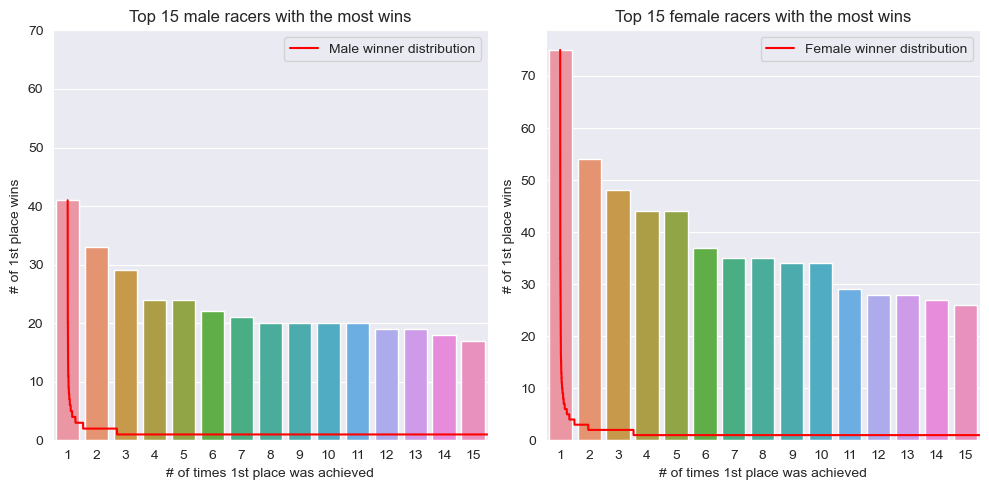

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(np.linspace(0, 15, len(winner_val_cnt_M)), winner_val_cnt_M['count'], 'r-', label = 'Male winner distribution')
ax[1].plot(np.linspace(0, 15, len(winner_val_cnt_F)), winner_val_cnt_F['count'], 'r-', label = 'Female winner distribution')
sns.barplot(data = winner_val_cnt_M.head(15), x = 'idx', y = 'count', ax = ax[0])
sns.barplot(data = winner_val_cnt_F.head(15), x = 'idx', y = 'count', ax = ax[1])
ax[0].set_title('Top 15 male racers with the most wins')
ax[0].set_xlabel('# of times 1st place was achieved')
ax[0].set_ylabel('# of 1st place wins')
ax[0].set_yticks(np.arange(0, 71, 10))
ax[0].legend()
ax[1].set_title('Top 15 female racers with the most wins')
ax[1].set_xlabel('# of times 1st place was achieved')
ax[1].set_ylabel('# of 1st place wins')
ax[1].set_yticks(np.arange(0, 71, 10))
ax[1].legend()
plt.tight_layout()
'''
I need to properly align the tick marks on both plots
I need to check out the plotted lines on both figures and find out if this is the way to properly display that data.
'''
